In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data
### LIAR Dataset

Contains short political claims labeled on a 6-level truth scale:
- pants-fire, false, barely-true, half-true, mostly-true, true

In [20]:
liar_cols = [
    "id", "label", "statement", "subject", "speaker",
    "job", "state", "party", "barely_true",
    "false", "half_true", "mostly_true",
    "pants_fire", "context"
]

train_liar = pd.read_csv("../data/raw/liar/train.tsv", sep="\t", header=None, names=liar_cols)
valid_liar = pd.read_csv("../data/raw/liar/valid.tsv", sep="\t", header=None, names=liar_cols)
test_liar  = pd.read_csv("../data/raw/liar/test.tsv", sep="\t", header=None, names=liar_cols)
liar_df = pd.concat([train_liar, valid_liar, test_liar], ignore_index=True)

In [21]:
liar_df.shape

(12791, 14)

In [22]:
liar_df.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [23]:
liar_df.isna().sum()

id                0
label             0
statement         0
subject           2
speaker           2
job            3568
state          2751
party             2
barely_true       2
false             2
half_true         2
mostly_true       2
pants_fire        2
context         131
dtype: int64

In [24]:
print("LIAR speakers sample:", liar_df["speaker"].unique()[:10])

LIAR speakers sample: ['dwayne-bohac' 'scott-surovell' 'barack-obama' 'blog-posting'
 'charlie-crist' 'robin-vos' 'republican-party-texas' 'oregon-lottery'
 'duey-stroebel' 'robert-menendez']


In [25]:
liar_df["label"] = liar_df["label"].apply(lambda x: 1 if x in ["true", "mostly-true"] else 0)

In [26]:
liar_df.head()

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_fire,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [27]:
liar_df.columns

Index(['id', 'label', 'statement', 'subject', 'speaker', 'job', 'state',
       'party', 'barely_true', 'false', 'half_true', 'mostly_true',
       'pants_fire', 'context'],
      dtype='object')

In [28]:
liar_df = pd.DataFrame({
                "title": None,
                "text": liar_df["statement"],
                "source": liar_df["speaker"],
                "date": None,
                "dataset": "LIAR",
                "label": liar_df["label"]})

In [29]:
liar_df

,title,text,source,date,dataset,label
0,None,Says the Annies List political group supports ...,dwayne-bohac,None,LIAR,0
1,None,When did the decline of coal start? It started...,scott-surovell,None,LIAR,0
2,None,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,None,LIAR,1
3,None,Health care reform legislation is likely to ma...,blog-posting,None,LIAR,0
4,None,The economic turnaround started at the end of ...,charlie-crist,None,LIAR,0
...,...,...,...,...,...,...
12786,None,Says his budget provides the highest state fun...,rick-scott,None,LIAR,0
12787,None,Ive been here almost every day.,jay-nixon,None,LIAR,0
12788,None,"In the early 1980s, Sen. Edward Kennedy secret...",mackubin-thomas-owens,None,LIAR,0
12789,None,Says an EPA permit languished under Strickland...,john-kasich,None,LIAR,0


### ISOT Dataset

Contains news articles from reliable vs unreliable sources

In [30]:
fake_isot = pd.read_csv("../data/raw/isot/Fake.csv")
true_isot = pd.read_csv("../data/raw/isot/True.csv")

fake_isot["label"] = 0
true_isot["label"] = 1

isot_df = pd.concat([fake_isot, true_isot], ignore_index=True)

In [31]:
isot_df.shape

(44898, 5)

In [32]:
isot_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [33]:
isot_df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [34]:
isot_df = pd.DataFrame({
                "title": isot_df["title"],
                "text": isot_df["text"],
                "source": None,
                "date": isot_df.get("date"),
                "dataset": "ISOT",
                "label": isot_df["label"]
})

In [35]:
isot_df

,title,text,source,date,dataset,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,None,"December 31, 2017",ISOT,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,None,"December 31, 2017",ISOT,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",None,"December 30, 2017",ISOT,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",None,"December 29, 2017",ISOT,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,None,"December 25, 2017",ISOT,0
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,None,"August 22, 2017",ISOT,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",None,"August 22, 2017",ISOT,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,None,"August 22, 2017",ISOT,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,None,"August 22, 2017",ISOT,1


### FakeNewsNet CSV version

Contains full news articles, social context (tweets, likes, shares), source-level information

In [36]:
fakenewsnet_csvs = [
    ("../data/raw/fakenewsnet/politifact_fake.csv", 0, "Politifact-Fake"),
    ("../data/raw/fakenewsnet/politifact_real.csv", 1, "Politifact-Real"),
    ("../data/raw/fakenewsnet/gossipcop_fake.csv", 0, "GossipCop-Fake"),
    ("../data/raw/fakenewsnet/gossipcop_real.csv", 1, "GossipCop-Real")
]

fakenewsnet_df_list = []
for path, label, dataset_name in fakenewsnet_csvs:
    df = pd.read_csv(path)
    df["text"] = df["title"]
    df["dataset"] = dataset_name
    df["label"] = label

    df = df[["title", "text", "dataset", "label", "news_url"]]
    
    fakenewsnet_df_list.append(df)
    
fakenewsnet_df = pd.concat(fakenewsnet_df_list, ignore_index=True)

In [37]:
fakenewsnet_df.shape

(23196, 5)

In [38]:
fakenewsnet_df.head()

,title,text,dataset,label,news_url
0,BREAKING: First NFL Team Declares Bankruptcy O...,BREAKING: First NFL Team Declares Bankruptcy O...,Politifact-Fake,0,speedtalk.com/forum/viewtopic.php?t=51650
1,Court Orders Obama To Pay $400 Million In Rest...,Court Orders Obama To Pay $400 Million In Rest...,Politifact-Fake,0,politics2020.info/index.php/2018/03/13/court-o...
2,UPDATE: Second Roy Moore Accuser Works For Mic...,UPDATE: Second Roy Moore Accuser Works For Mic...,Politifact-Fake,0,www.nscdscamps.org/blog/category/parenting/467...
3,Oscar Pistorius Attempts To Commit Suicide,Oscar Pistorius Attempts To Commit Suicide,Politifact-Fake,0,https://howafrica.com/oscar-pistorius-attempts...
4,Trump Votes For Death Penalty For Being Gay,Trump Votes For Death Penalty For Being Gay,Politifact-Fake,0,http://washingtonsources.org/trump-votes-for-d...


In [40]:
fakenewsnet_df.isna().sum()

title         0
text          0
dataset       0
label         0
news_url    330
dtype: int64

### Scraped News Data

In [41]:
import feedparser
from newspaper import Article
import pandas as pd
from datetime import datetime
from tqdm import tqdm

In [74]:
def scrape_rss_feed(feed_url, source, limit=500):
    """
    Scrapes full news articles from an RSS feed and returns them as a DataFrame.

    Reads an RSS feed URL, extracts article links, downloads and parses
    the full article content using newspaper3k and structures the results into a
    pandas DataFrame.

    Parameters:
        feed_url (str): URL of the RSS feed to scrape articles from.
        source (str): Name of the news source ('Reuters', 'BBC').
        limit (int): Maximum number of articles to scrape from the feed.

    Returns:
        pandas.DataFrame: A DataFrame containing article titles, full text, source,
        timestamp, dataset identifier, and a label indicating real news.
    """

    feed = feedparser.parse(feed_url)
    records = []

    for entry in tqdm(feed.entries[:limit], desc=f"Scraping {source}"):
        url = entry.link
        try:
            article = Article(url)
            article.download()
            article.parse()

            records.append({
                "title": article.title,
                "text": article.text,
                "source": source,
                "date": datetime.now(),
                "dataset": f"Scraped-{source}",
                "label": 1  # REAL
            })
        except Exception as e:
            print(f"Skipping {url}: {e}")

    return pd.DataFrame(records)

In [ ]:
# Reuters
reuters_df = scrape_rss_feed("https://www.reuters.com/rssFeed/worldNews", source="Reuters", limit=500)

# BBC
bbc_df = scrape_rss_feed("http://feeds.bbci.co.uk/news/world/rss.xml", source="BBC", limit=500)

scraped_df = pd.concat([reuters_df, bbc_df], ignore_index=True)

scraped_df.head()

Scraping Reuters: 0it [00:00, ?it/s]
Scraping BBC:  50%|██████████████████████████████████                                  | 17/34 [00:12<00:12,  1.37it/s]

In [60]:
scraped_df["source"].value_counts()

source
BBC    32
Name: count, dtype: int64

In [61]:
scraped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    32 non-null     object        
 1   text     32 non-null     object        
 2   source   32 non-null     object        
 3   date     32 non-null     datetime64[ns]
 4   dataset  32 non-null     object        
 5   label    32 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.6+ KB


In [62]:
# Removing empty articles
scraped_df = scraped_df[scraped_df["text"].str.len() > 200]

# Checking duplicates
scraped_df = scraped_df.drop_duplicates(subset=["title"])

In [63]:
scraped_df.to_csv("../data/raw/scraped_news.csv", index=False)

## Combining the Dataset

In [64]:
df = pd.concat([liar_df, isot_df, fakenewsnet_df, scraped_df], ignore_index=True)

In [65]:
df.head()

,title,text,source,date,dataset,label,news_url
0,None,Says the Annies List political group supports ...,dwayne-bohac,None,LIAR,0,NaN
1,None,When did the decline of coal start? It started...,scott-surovell,None,LIAR,0,NaN
2,None,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,None,LIAR,1,NaN
3,None,Health care reform legislation is likely to ma...,blog-posting,None,LIAR,0,NaN
4,None,The economic turnaround started at the end of ...,charlie-crist,None,LIAR,0,NaN


In [66]:
df = df.dropna(subset=["text"])

In [67]:
df["text"] = df["text"].astype(str)

In [68]:
df.head()

,title,text,source,date,dataset,label,news_url
0,None,Says the Annies List political group supports ...,dwayne-bohac,None,LIAR,0,NaN
1,None,When did the decline of coal start? It started...,scott-surovell,None,LIAR,0,NaN
2,None,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama,None,LIAR,1,NaN
3,None,Health care reform legislation is likely to ma...,blog-posting,None,LIAR,0,NaN
4,None,The economic turnaround started at the end of ...,charlie-crist,None,LIAR,0,NaN


In [69]:
df.isna().sum()

title       12791
text            0
source      68096
date        35987
dataset         0
label           0
news_url    58051
dtype: int64

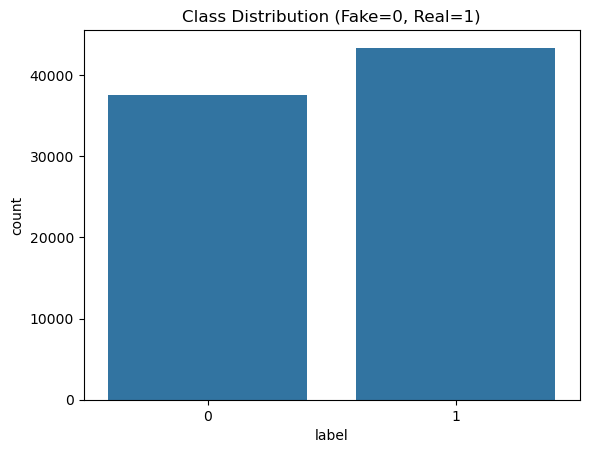

In [70]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution (Fake=0, Real=1)")
plt.show()

In [71]:
print(df["label"].value_counts())

label
1    43397
0    37520
Name: count, dtype: int64


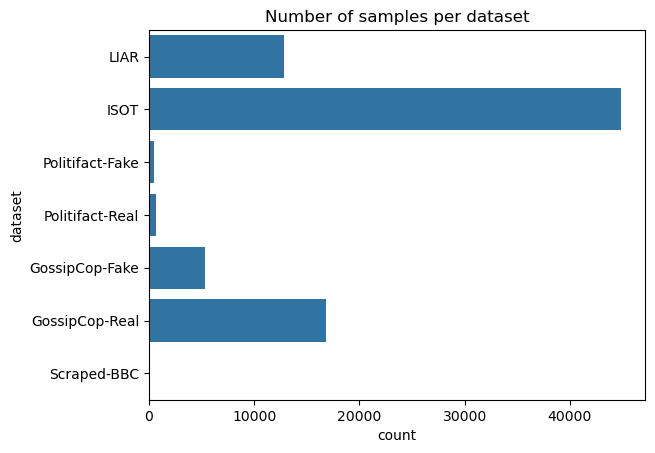

In [72]:
sns.countplot(y="dataset", data=df)
plt.title("Number of samples per dataset")
plt.show()

In [73]:
df["dataset"].value_counts()

dataset
ISOT               44898
GossipCop-Real     16817
LIAR               12791
GossipCop-Fake      5323
Politifact-Real      624
Politifact-Fake      432
Scraped-BBC           32
Name: count, dtype: int64